# **Topic : Introduction to Data Processing and Prediction Modelling using scikit-learn**

## **Objective for this template:**
1. To understand coorrelation analysis and various preprocessing methods in scikit-learn
2. To perform preprocessing to prepare a dataset for machine learning
3. To demonstrate the importance of preprocessing
4. To undestand how to deal with categorical variables inside a dataset
5. To build and test regression and classification prediction models

Designed By: Rodolfo C. Raga Jr. Copyright @2021

__Permission granted to use template for educational purposes so long as this heading is not removed.__
---

### =========================================================================================

# Installing Scikit-Learn

SciKit-Learn (also referred to as sklearn) provides a wide array of statistical models, machine learning, and pre-processing tools. Preprocessing s an important and crucial step to go through before building a prediction model.

Scikit-Learn requires the following libraries to be pre-installed: NumPy, SciPy, Matplotlib, IPython, Sympy, and Pandas. In Windows, these dependent libraries can be installed using the following commands:

    pip install numpy
    pip install scipy
    pip install matplotlib
    pip install ipython
    pip install sympy
    pip install pandas
    
After installing the dependent libraries, Scikit-Learn can now be installed using the command:

    pip install scikit-learn
    
To check if Scikit-Learn was properly installed in Python, issue the import statement as shown:    

    import sklearn

# Correlation Analysis

__Correlation__ is a statistical term describing the degree to which two variables move in coordination with one another. If the two variables move in the same direction, then those variables are said to have a positive correlation. If they move in opposite directions, then they have a negative correlation.

A correlation matrix is a handy way to calculate the pairwise correlation coefficients between two or more (numeric) variables. The Pandas data frame has this functionality built-in to its corr() method, which I have wrapped inside the round() method to keep things tidy. 

Notice that every correlation matrix is symmetrical: the correlation of “Weight” with “Length1” is the same as the correlation of “Length1” with “Weight” (0.92). Thus, the top (or bottom, depending on your preferences) of every correlation matrix is redundant. The correlation between each variable and itself is 1.0, shown in the diagonal.

In [348]:
df = pd.read_csv('E:/My Documents/Files (1st Sem 2021-2022)/Research/Training - DataScience and DL workshop/datasets/Fish_Species.csv')
corr_mat = df.corr()
round(corr_mat,2)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.00,0.92,0.92,0.92,0.72,0.89
Length1,0.92,1.00,1.00,0.99,0.63,0.87
Length2,0.92,1.00,1.00,0.99,0.64,0.87
Length3,0.92,0.99,0.99,1.00,0.70,0.88
Height,0.72,0.63,0.64,0.70,1.00,0.79
Width,0.89,0.87,0.87,0.88,0.79,1.00


__Correlation matrix__ to __heat map__¶ 

Once the correlation matrix is defined, it can be passed to Seaborn’s heatmap() method to create a heatmap (or headgrid). The basic idea of heatmaps is that they replace numbers with colors of varying shades, as indicated by the scale on the right. Cells that are lighter have higher values. This type of visualization can make it much easier to spot linear relationships between variables than a table of numbers. 

<AxesSubplot:>

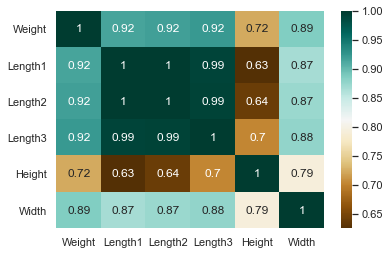

In [351]:
sns.heatmap(corr_mat,cmap="BrBG",annot=True)

# Dataset preprocessing using sklearn

__Data Preprocessing__ is a technique used to convert the raw data into a clean data set. __Data preprocessing__ tasks can range from a mere change in notation to changing a continuous variable to a categorical variable.

The __sklearn.preprocessing__ package provides various functions and classes to change the form of certain variables to make it suitable for the algorithm it will be used for. Before using this package, we will need to import it as shown:

   __from sklearn import preprocessing__ 
                                        

## Scikit-Learn for standardization

Data standardization is the process of bringing data into a uniform format that allows analysts and others to research, analyze, and utilize the data. In statistics, standardization refers to the process of putting different variables on the same scale in order to compare scores between different types of variables.ata.

Distance based models are machine learning algorithms that use distances to check if they are similar or not. If two points are close together, one can infer that the feature values are simiar and hence, can be classified as similar. Standardization is an essential task for distance based models so that one particular feature does not dominate over the other.

In [305]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# List of temperatures recorded in Bloomington
temperatures_list = [33.2,33.1,33.1,33.0,32.9,32.9,32.8,32.8,32.7,32.7,32.6,32.6,32.6,32.6,
                    32.5,32.5,32.5,32.6,32.6,32.6,32.7,32.7,32.8,32.9,33.0,33.1,33.2,33.4,33.5, 33.7, 33.9]

# Convert the list to a NumPy array
temperatures_np = np.array(temperatures_list).reshape(-1,1)

print("Raw Values:",temperatures_np.reshape(1,-1))

# Standardize the vector
temperatures_std = StandardScaler().fit_transform(temperatures_np)

print("\nStandardized Values:",temperatures_std.reshape(1,-1))

# Print the means
print("\nMean Before Standardizing:",sum(temperatures_list)/len(temperatures_list))
print("Mean After Standardizing:",sum(temperatures_std[0])/len(temperatures_std))

Raw Values: [[33.2 33.1 33.1 33.  32.9 32.9 32.8 32.8 32.7 32.7 32.6 32.6 32.6 32.6
  32.5 32.5 32.5 32.6 32.6 32.6 32.7 32.7 32.8 32.9 33.  33.1 33.2 33.4
  33.5 33.7 33.9]]

Standardized Values: [[ 0.85824173  0.57520456  0.57520456  0.2921674   0.00913023  0.00913023
  -0.27390693 -0.27390693 -0.5569441  -0.5569441  -0.83998126 -0.83998126
  -0.83998126 -0.83998126 -1.12301843 -1.12301843 -1.12301843 -0.83998126
  -0.83998126 -0.83998126 -0.5569441  -0.5569441  -0.27390693  0.00913023
   0.2921674   0.57520456  0.85824173  1.42431606  1.70735322  2.27342755
   2.83950188]]

Mean Before Standardizing: 32.896774193548396
Mean After Standardizing: 0.02768521695594778


## Scikit-Learn for normalization

Normalization is another feature scaling technique used to transform the values of the numeric attributes to a standard scale (0 to 1). Normalization is used in cases where the values do not follow Gaussian distribution. (Rule of thumb - Standardize if the attribute can be modeled to be a Gaussian distribution. If not, normalize).

Normalization is important because it does not provide a window for the model to prefer one attribute because of the scale of values. 

In [307]:
#Import libraries
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#List of temperatures recorded in Bloomington
temperatures_list = [33.2,33.1,33.1,33.0,32.9,32.9,32.8,32.8,32.7,32.7,32.6,32.6,32.6,32.6,
                    32.5,32.5,32.5,32.6,32.6,32.6,32.7,32.7,32.8,32.9,33.0,33.1,33.2,33.4,33.5, 33.7, 33.9]

#Convert the list to a NumPy array
temperatures_np = np.array(temperatures_list).reshape(-1,1)
print("Raw Values:",temperatures_np.reshape(1,-1))

#Normalize the vector
temperatures_norm = MinMaxScaler().fit_transform(temperatures_np)
print("\nNormalized Values:",temperatures_norm.reshape(1,-1))

print("\nMinimum Value Before Normalization:",min(temperatures_np.reshape(1,-1)[0]))
print("Maximum Value Before Normalization:",max(temperatures_np.reshape(1,-1)[0]))
print("Minimum Value After Normalization:",min(temperatures_norm))
print("Maximum Value After Normalization:",max(temperatures_norm))

Raw Values: [[33.2 33.1 33.1 33.  32.9 32.9 32.8 32.8 32.7 32.7 32.6 32.6 32.6 32.6
  32.5 32.5 32.5 32.6 32.6 32.6 32.7 32.7 32.8 32.9 33.  33.1 33.2 33.4
  33.5 33.7 33.9]]

Normalized Values: [[0.5        0.42857143 0.42857143 0.35714286 0.28571429 0.28571429
  0.21428571 0.21428571 0.14285714 0.14285714 0.07142857 0.07142857
  0.07142857 0.07142857 0.         0.         0.         0.07142857
  0.07142857 0.07142857 0.14285714 0.14285714 0.21428571 0.28571429
  0.35714286 0.42857143 0.5        0.64285714 0.71428571 0.85714286
  1.        ]]

Minimum Value Before Normalization: 32.5
Maximum Value Before Normalization: 33.9
Minimum Value After Normalization: [0.]
Maximum Value After Normalization: [1.]


### Scikit-Learn for encoding categorical features

Many algorithms take in only numeric input. Unfortunately, almost every dataset has a feature (or more than one feature), that
is categorical in nature. Commaon categorical variables in a dataset could be the client's gender (male/female) and their 
choice of product options (large, medium, small). These categorical features have to be encoded into its numeric form.

There are 2 types of encoding that can be applied: Label Encoding and One Hot Encoding

__Label Encoding__ would involve converting each value in a column to a number. 

label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is resolved when using __‘One-Hot Encoding’__. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

Label Encoding

In [311]:
from sklearn.preprocessing import LabelEncoder

bands = ["Pink Floyd","Led Zeppelin","Pink Floyd","Foo Fighters","Queen","Queen","Pink Floyd","AC/DC","Foo Fighters","Led Zeppelin","Queen",
           "Nirvana","AC/DC","The Doors","Queen","Fleetwood Mac","Nirvana"]

# Invoking an instance of Label Encoder
label_encoding = LabelEncoder()

# Fit the labels
encoded = label_encoding.fit(bands)

print("Raw Categorical Form:",bands)
print("\nEncoded Numeric Form:",encoded.transform(bands))

Raw Categorical Form: ['Pink Floyd', 'Led Zeppelin', 'Pink Floyd', 'Foo Fighters', 'Queen', 'Queen', 'Pink Floyd', 'AC/DC', 'Foo Fighters', 'Led Zeppelin', 'Queen', 'Nirvana', 'AC/DC', 'The Doors', 'Queen', 'Fleetwood Mac', 'Nirvana']

Encoded Numeric Form: [5 3 5 2 6 6 5 0 2 3 6 4 0 7 6 1 4]


One-hot Encoding

If the band_list feature is one-hot encoded, it would be represented in 1’s and 0’s instead of decimals.

In [313]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

band_list = np.array(["AC/DC","Fleetwood Mac","Foo Fighters","Led Zeppelin","Nirvana","Pink Floyd","Queen","The Doors"]).reshape(-1,1)

# Invoking an instance of Label Encoder
label_encoding = OneHotEncoder()

# Fit the labels
encoded = label_encoding.fit(band_list)

print("Raw Categorical Form:",bands)
print("\nEncoded One-hot Form:\n",encoded.transform(band_list).toarray())

Raw Categorical Form: ['Pink Floyd', 'Led Zeppelin', 'Pink Floyd', 'Foo Fighters', 'Queen', 'Queen', 'Pink Floyd', 'AC/DC', 'Foo Fighters', 'Led Zeppelin', 'Queen', 'Nirvana', 'AC/DC', 'The Doors', 'Queen', 'Fleetwood Mac', 'Nirvana']

Encoded One-hot Form:
 [[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


### Scikit-Learn for filling missing values

Real and actual datasets occur in noisy form and always have missing values. Cleaning the dataset and handling missing data is important aspect of preprocessing as many algorithms do not perform well with these data flaws in place.

Scikit-Learn’s impute module can deal with these data flaws in two ways:
    
    - 1. One way to deal with missing values is to remove the row of data with a missing value
    - 2. Another way is to replace the missing values with values that can be inferred from known data. Ex. replace the 
            missing data with the mean of that column.

Missing values are encoded with NumPy’s NaN (numpy.nan)

The following are the temperatures recorded in Bloomington (in Fahrenheits) in Illinois in the month of February:

In [66]:
import numpy as np
from sklearn.impute import SimpleImputer

#List of temperatures
temperatures = [33.2,32.8,32.9,33.0,"NaN",33.2,33.4,33.1,32.6,32.5,32.5,33.1,33.0,"NaN",32.7,32.7,32.6,"NaN",32.6,32.9,32.8,
                32.8,32.5,32.6,"NaN",32.6,32.7,32.7,33.5, 33.7,33.9]

temperatures_cleaned = []

#Replace NaN's with np.nan
for temperature in temperatures:
    if temperature=="NaN":
        temperatures_cleaned.append(np.nan)
    else:
        temperatures_cleaned.append(temperature)

temperatures_np = np.array(temperatures_cleaned).reshape(-1,1)

# Create an instance of the imputer
imputer_mean = SimpleImputer(missing_values=np.nan,strategy='mean')

#Transform the array and fit according to the chosen strategy
temperatures_np = imputer_mean.fit_transform(temperatures_np)

print(*temperatures_np, sep=", ")

[33.2], [32.8], [32.9], [33.], [32.91111111], [33.2], [33.4], [33.1], [32.6], [32.5], [32.5], [33.1], [33.], [32.91111111], [32.7], [32.7], [32.6], [32.91111111], [32.6], [32.9], [32.8], [32.8], [32.5], [32.6], [32.91111111], [32.6], [32.7], [32.7], [33.5], [33.7], [33.9]


### Extracting Features Matrix and Target Array

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.
For example, consider the Fish-Species.csv dataset shown below:

In [318]:
import seaborn as sns
df = pd.read_csv('E:/My Documents/Files (1st Sem 2021-2022)/Research/Training - DataScience and DL workshop/datasets/Fish_Species.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


#### Features matrix

From this two-dimensional table of data, prior to running machine learning algorithms, we will need to extract the __Features Matrix__. The features matrix is a term used in machine learning to describe the list of columns that contain independent variables to be processed, including all lines in the dataset. These lines in the dataset are called lines of observation.

By convention, this features matrix is often stored in a variable named __X__. Each row in this matrix refer to the individual objects described by the dataset. The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.

Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.

The target variable array is a term used in Machine Learning to define the list of dependent variables in the existing dataset. Here we also have lines of observations which is the list of those variables by line.

With this target array in mind, we can use Seaborn (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data:

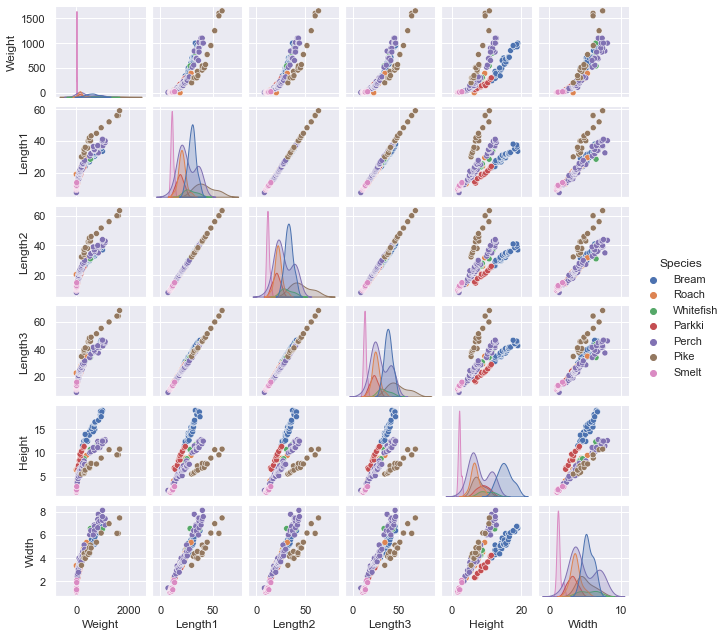

In [88]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df, hue='Species', height=1.5);

Using Scikit-Learn, we can extract both the features matrix and target array from the ``DataFrame`` holding the data from the dataset. This can be done using some Pandas ``DataFrame`` operations. 

In [319]:
X_fish_attribs = df.drop('Species', axis=1)
X_fish_attribs.shape
X_fish_attribs.head

<bound method NDFrame.head of      Weight  Length1  Length2  Length3   Height   Width
0     242.0     23.2     25.4     30.0  11.5200  4.0200
1     290.0     24.0     26.3     31.2  12.4800  4.3056
2     340.0     23.9     26.5     31.1  12.3778  4.6961
3     363.0     26.3     29.0     33.5  12.7300  4.4555
4     430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...      ...      ...      ...      ...     ...
154    12.2     11.5     12.2     13.4   2.0904  1.3936
155    13.4     11.7     12.4     13.5   2.4300  1.2690
156    12.2     12.1     13.0     13.8   2.2770  1.2558
157    19.7     13.2     14.3     15.2   2.8728  2.0672
158    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 6 columns]>

In [320]:
y_fish_attribs = df['Weight']
y_fish_attribs.shape
y_fish_attribs.head

<bound method NDFrame.head of 0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64>

The resulting expected layout of features and target values can be visualized using the following diagram:

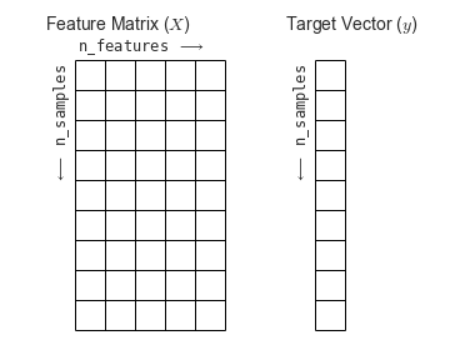

## Building Preediction Models using Scikit-Learn's API

Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. Model Selection and importing of the appropriate estimator class from Scikit-Learn.
2. Setting model hyperparameters through class instantiation.
3. Extraction of features matrix and target array.
4. Model Fitting using the ``fit()`` method of the model instance.
5. Model evaluation and Deployment:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.



### Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example:

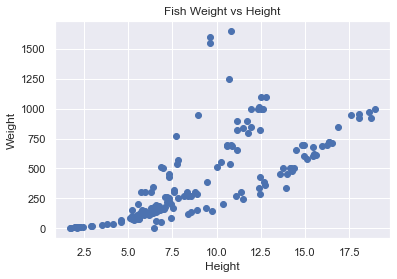

In [325]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("Fish Weight vs Height")
plt.ylabel('Weight')
plt.xlabel('Height');
plt.scatter(X_fish_attribs.Height, y_fish_attribs);


With this data in place, we can use the steps outlined earlier. 

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [183]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you can read more about them in the [``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

An important point is that *a class of model is not the same as an instance of a model*.

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

Different model training algorithms require different hyperparameters, some simple algorithms (such as ordinary least squares regression) require none. Given these hyperparameters, the training algorithm learns the parameters from the data. 

In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

For our linear regression example, we can instantiate the ``LinearRegression`` class and specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [328]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

#### 3. Extract features matrix and target array from dataset

Previously, we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.
Here the target variable ``y`` and the matrix feature ``x`` is extracted (Note: Notice the resulting data shape).
Sometimes, this process requires some amount of reshaping to massage the data to a proper form.

Pre-processing by applying Normalization is also demonstrated.

In [341]:
X = df[['Width']]
print(X.shape)

y = df['Weight']
y = y.astype('int')
print(y.shape)

#Convert the list to a NumPy array
X_np = np.array(X)
print("Raw data form:\n",X_np.reshape(1,-1))

#Normalize the vector
X_norm = MinMaxScaler().fit_transform(X_np)
print("\nRaw data form:\n",X_norm.reshape(1,-1))

print("Minimum Value Before Normalization:",min(X_np.reshape(1,-1)[0]))
print("Maximum Value Before Normalization:",max(X_np.reshape(1,-1)[0]))
print("Minimum Value After Normalization:",min(X_norm))
print("Maximum Value After Normalization:",max(X_norm))
#print(X_norm.shape)

(159, 1)
(159,)
Raw data form:
 [[4.02   4.3056 4.6961 4.4555 5.134  4.9274 5.2785 4.69   4.8438 4.9594
  5.1042 4.8146 4.368  5.0728 5.1708 5.58   5.2854 5.1975 5.1338 5.7276
  5.5695 5.3704 5.2801 6.1306 5.589  6.0532 6.09   5.8515 6.1984 6.603
  6.3063 6.292  6.7497 6.7473 6.3705 2.268  2.8217 2.9044 3.1746 3.5742
  3.3516 3.3957 3.2943 3.7544 3.5478 3.8203 3.325  3.8    3.8352 3.6312
  4.1272 3.906  4.4968 4.7736 5.355  4.2476 4.2485 4.6816 6.562  6.5736
  6.525  2.3265 2.3142 2.673  2.9181 3.2928 3.2944 3.4104 3.1571 3.6636
  4.144  4.234  1.408  1.9992 2.432  2.6316 2.9415 3.3216 3.1234 3.0502
  3.0368 2.772  3.555  3.3075 3.6675 3.534  3.4075 3.525  3.525  3.525
  3.995  3.624  3.624  3.63   3.626  3.725  3.723  3.825  4.1658 3.6835
  4.239  4.144  5.1373 4.335  4.335  4.5662 4.2042 4.6354 4.7716 6.018
  6.3875 7.7957 6.864  6.7408 6.2646 6.3666 7.4934 6.003  7.3514 7.1064
  7.225  7.4624 6.63   6.8684 7.2772 7.4165 8.142  7.5958 3.3756 4.158
  4.3844 4.0198 4.5765 3.977  4.3225

#### 4. Fit the model to your data

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [330]:
model.fit(X, y)

LinearRegression()

This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; for example in this linear model, we have the following:

In [331]:
model.coef_

array([188.30732217])

In [332]:
model.intercept_

-433.57443149873376

These two parameters represent the slope and intercept of the simple linear fit to the data.
Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

In [342]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7861184409433088


#### 5. Model Evaluation

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [334]:
xfit = np.linspace(-1, 11)

As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

In [335]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

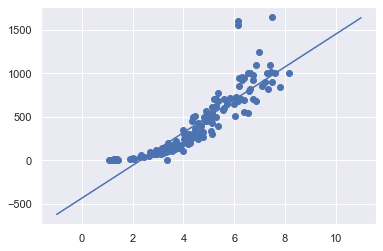

In [336]:
plt.scatter(X, y)
plt.plot(xfit, yfit);

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

#### 6. Model Deployment

Once the model is trained and validated, the next task is to deploy it in an actual business environment. As such, model deployment is simply the engineering task of exposing an prediction model to real to support the day-to-day decision making process.

In [343]:
# take three values from user
weight = float(input("Enter Width of Fish: "))
predicted_Weight =  -433.57443149873376 + (188.30732217 * weight)
print("Estimated weight of fish is {:0.2f}".format(predicted_Weight))


Enter Width of Fish: 4.02
Estimated weight of fish is 323.42


### Supervised learning example: Iris classification

Let's take a look at another example of this process, using the Iris dataset we discussed earlier.
Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution (see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a *training set* and a *testing set*.
This could be done by hand, but it is more convenient to use the ``train_test_split`` utility function:

In [241]:
from sklearn.linear_model import LogisticRegression
X_fish_attribs = df.drop('Species', axis=1)
X_fish_attribs.shape
X_fish_attribs.head

y_fish_attribs = df['Species']
y_fish_attribs.shape
y_fish_attribs.head

<bound method NDFrame.head of 0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object>

In [242]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_fish_attribs, y_fish_attribs,
                                                random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [279]:
from sklearn.linear_model import LogisticRegression                          # 1. choose model class
model = LogisticRegression(random_state=1,solver='liblinear', max_iter=100)      # 2. instantiate model
model.fit(Xtrain, ytrain)                                                    # 3. fit model to data
y_model = model.predict(Xtest)                                               # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [283]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Acccuracy Score {:0.2f}".format(accuracy_score(ytest, y_model)))

print("Predicted:\n",y_model)

print("\nActual:\n",ytest.values)

cmtx = pd.DataFrame(
    confusion_matrix(ytest, y_model, labels=['Bream','Perch','Smelt','Roach','Whitefish','Pike','Parkki']),
    index=['Bream','Perch','Smelt','Roach','Whitefish','Pike','Parkki'], 
    columns=['Bream','Perch','Smelt','Roach','Whitefish','Pike','Parkki']
)    

print(cmtx)
print(Xtest)

Acccuracy Score 0.85
Predicted:
 ['Bream' 'Roach' 'Bream' 'Perch' 'Perch' 'Bream' 'Perch' 'Bream' 'Smelt'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Parkki' 'Perch'
 'Perch' 'Perch' 'Smelt' 'Roach' 'Roach' 'Bream' 'Perch' 'Bream' 'Bream'
 'Smelt' 'Pike' 'Perch' 'Perch' 'Perch' 'Perch' 'Pike' 'Perch' 'Perch'
 'Roach' 'Parkki' 'Bream' 'Perch']

Actual:
 ['Bream' 'Roach' 'Bream' 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Roach'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Whitefish' 'Perch' 'Parkki'
 'Roach' 'Perch' 'Perch' 'Smelt' 'Roach' 'Roach' 'Bream' 'Perch' 'Bream'
 'Bream' 'Smelt' 'Pike' 'Perch' 'Perch' 'Perch' 'Perch' 'Pike' 'Whitefish'
 'Perch' 'Roach' 'Parkki' 'Bream' 'Whitefish']
           Bream  Perch  Smelt  Roach  Whitefish  Pike  Parkki
Bream          8      0      0      0          0     0       0
Perch          0     16      0      0          0     0       0
Smelt          0      0      2      0          0     0       0
Roach          0      2      1      4    

In [294]:
# take three values from user
weight = float(input("Enter Weight of Fish: "))
length1 = float(input("Enter Length1 of Fish: "))
length2 = float(input("Enter Length2 of Fish: "))
length3 = float(input("Enter Length3 of Fish: "))
height = float(input("Enter Height of Fish: "))
width = float(input("Enter Width of Fish: "))

predicted_Species =  model.predict(np.array([[weight, length1, length2, length3, height, width]]))
print("Estimated species of this fish is:", predicted_Species)
#120.0     19.4     21.0     23.7   6.1146  3.2943 'Roach'

Enter Weight of Fish: 120
Enter Length1 of Fish: 19.4
Enter Length2 of Fish: 21
Enter Length3 of Fish: 23.7
Enter Height of Fish: 6.1146
Enter Width of Fish: 3.2943
Estimated species of this fish is: ['Roach']


With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

## Application: Exploring Hand-written Digits

To demonstrate these principles on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits.
In the wild, this problem involves both locating and identifying characters in an image. Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels.
Let's visualize the first hundred of these:

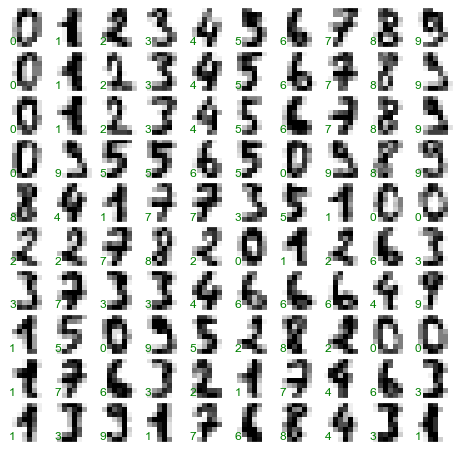

In [44]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, we need a two-dimensional, ``[n_samples, n_features]`` representation.
We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit.
Additionally, we need the target array, which gives the previously determined label for each digit.
These two quantities are built into the digits dataset under the ``data`` and ``target`` attributes, respectively:

In [45]:
X = digits.data
X.shape

(1797, 64)

In [46]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features.

### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to effectively visualize points in such a high-dimensional space.
Instead we'll reduce the dimensions to 2, using an unsupervised method.
Here, we'll make use of a manifold learning algorithm called *Isomap* (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)), and transform the data to two dimensions:

In [47]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

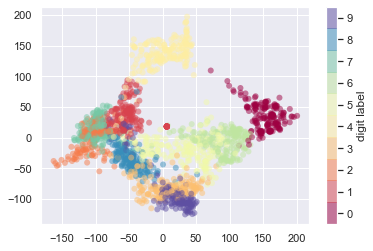

In [48]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. For example, zeros (in black) and ones (in purple) have very little overlap in parameter space.
Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
On the other hand, there seems to be a more or less continuous spectrum between ones and fours: we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.

Overall, however, the different groups appear to be fairly well separated in the parameter space: this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data.
Let's give it a try.

### Classification on digits

Let's apply a classification algorithm to the digits.
As with the Iris data previously, we will split the data into a training and testing set, and fit a Gaussian naive Bayes model:

In [49]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

With even this extremely simple model, we find about 80% accuracy for classification of the digits!
However, this single number doesn't tell us *where* we've gone wrong—one nice way to do this is to use the *confusion matrix*, which we can compute with Scikit-Learn and plot with Seaborn:

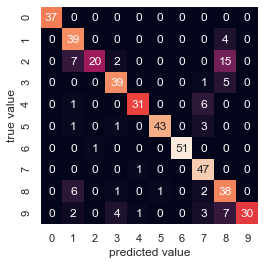

In [52]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mis-labeled points tend to be: for example, a large number of twos here are mis-classified as either ones or eights.
Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels.
We'll use green for correct labels, and red for incorrect labels:

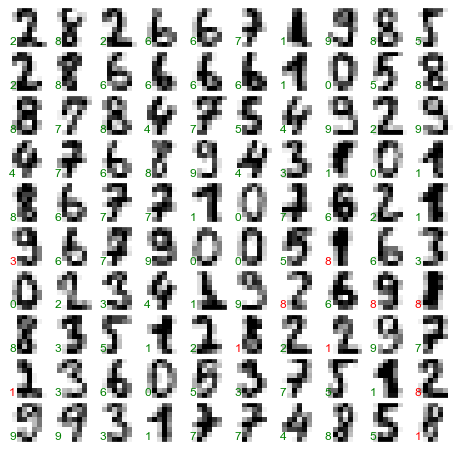

In [53]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.
To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), random forests (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)) or another classification approach.